## Regularização

### Aqui aumentamos a dimensionalida do nosso modelo para o grau 8

In [2]:
import numpy as np

def polyFeatures(X, p):
    X_poly = X
    if p >= 2:
        for k in range(1,p):
            X_poly = np.column_stack((X_poly, np.power(X,k+1)))   
    return X_poly


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def plotFit(min_x, max_x, mu, sigma, theta, p):

    x = np.array(np.arange(min_x - 15, max_x + 25, 0.05))
    X_poly = polyFeatures(x, p)
    X_poly = X_poly - mu
    X_poly = X_poly/sigma

    X_poly = np.column_stack((np.ones((x.shape[0],1)), X_poly))

    plt.plot(x, np.dot(X_poly, theta), '--', linewidth=2)


In [4]:
import numpy as np

def featureNormalize(X):
    mu = np.mean(X, axis=0)
    X_norm = X - mu

    sigma = np.std(X_norm, axis=0)
    X_norm = X_norm/sigma

    return X_norm, mu, sigma

In [5]:
import numpy as np

def learningCurve(X, y, Xval, yval, lambda_val):
    m = len(X)

    error_train = np.zeros((m, 1))
    error_val   = np.zeros((m, 1))

    for i in range(1,m+1):

        X_train = X[:i]
        y_train = y[:i]

        theta = trainLinearReg(X_train, y_train, lambda_val)

        error_train[i-1] = linearRegCostFunction(X_train, y_train, theta, 0)
        error_val[i-1]   = linearRegCostFunction(Xval   , yval   , theta, 0)
                
    return error_train, error_val

In [6]:
import numpy as np

def linearRegCostFunction(X, y, theta, lambda_val, return_grad=False):
    m = len(y)

    theta = np.reshape(theta, (-1,y.shape[1]))

    J = 0
    grad = np.zeros(theta.shape)

    J = ( 1./(2*m)) * np.power( (np.dot(X, theta) - y) , 2).sum() + ( float(lambda_val) / (2*m)) * np.power(theta[1:theta.shape[0]],2).sum()

    grad = (1./m) * np.dot( X.T, np.dot(X,theta) - y) + ( float(lambda_val) / m )*theta

    grad_no_regularization = (1./m) * np.dot( X.T, np.dot(X,theta) - y)
    grad[0] = grad_no_regularization[0]

    if return_grad == True:
        return J, grad.flatten()
    elif return_grad == False:
        return J 

In [7]:
import numpy as np
from scipy.optimize import minimize


def trainLinearReg(X, y, lambda_val):
    initial_theta = np.zeros((X.shape[1], 1))
    def costFunc(theta):
        return linearRegCostFunction(X, y, theta, lambda_val, True)
    maxiter = 200
    results = minimize(costFunc, x0=initial_theta, options={'disp': True, 'maxiter':maxiter}, method="L-BFGS-B", jac=True)

    theta = results["x"]
    return theta

In [8]:
import numpy as np

def validationCurve(X, y, Xval, yval):
    lambda_vec = np.array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])

    error_train = np.zeros((len(lambda_vec), 1))
    error_val = np.zeros((len(lambda_vec), 1))

    for i in range(len(lambda_vec)):

        lambda_val = lambda_vec[i]

        theta = trainLinearReg(X, y, lambda_val)
        error_train[i] = linearRegCostFunction(X,    y,    theta, 0)
        error_val[i]   = linearRegCostFunction(Xval, yval, theta, 0)
         
    return lambda_vec, error_train, error_val


### Todos estes métodos ja foram descritos em outros exercicios e reutilizados. Mas o importante é identificar na variavel p=8 o 8 grau do nosso polinomio

In [11]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

mat = scipy.io.loadmat('am-T1-dados/ex5data1.mat')

X = mat["X"]
y = mat["y"]
Xval = mat["Xval"]
yval = mat["yval"]
Xtest = mat["Xtest"]
ytest = mat["ytest"]

m = X.shape[0]

theta = np.array([[1] , [1]])
X_padded = np.column_stack((np.ones((m,1)), X))
J = linearRegCostFunction(X_padded, y, theta, 1)

theta = np.array([[1] , [1]])
J, grad = linearRegCostFunction(X_padded, y, theta, 1, True)

lambda_val = 0
theta = trainLinearReg(X_padded, y, lambda_val)

error_train, error_val = learningCurve(np.column_stack((np.ones((m,1)), X)), y, np.column_stack((np.ones((Xval.shape[0], 1)), Xval)), yval, lambda_val)

p = 8;

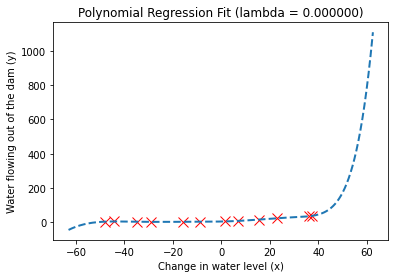

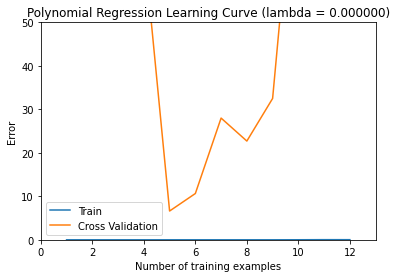

In [10]:

X_poly = polyFeatures(X, p)
X_poly, mu, sigma = featureNormalize(X_poly) 
X_poly = np.column_stack((np.ones((m,1)), X_poly)) 

X_poly_test = polyFeatures(Xtest, p)
X_poly_test = X_poly_test - mu
X_poly_test = X_poly_test / sigma
X_poly_test = np.column_stack((np.ones((X_poly_test.shape[0],1)), X_poly_test)) 

X_poly_val = polyFeatures(Xval, p)
X_poly_val = X_poly_val - mu
X_poly_val = X_poly_val / sigma
X_poly_val = np.column_stack((np.ones((X_poly_val.shape[0],1)), X_poly_val)) 

lambda_val = 0;
theta = trainLinearReg(X_poly, y, lambda_val)

plt.figure(1)
plt.plot(X, y, 'rx', markersize=10, linewidth=1.5)
plotFit(min(X), max(X), mu, sigma, theta, p)
plt.xlabel('Change in water level (x)') 
plt.ylabel('Water flowing out of the dam (y)')
plt.title ('Polynomial Regression Fit (lambda = {:f})'.format(lambda_val))
plt.show(block=False)

plt.figure(2)
error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, lambda_val)
p1, p2 = plt.plot(range(1,m+1), error_train, range(1,m+1), error_val)

plt.title('Polynomial Regression Learning Curve (lambda = {:f})'.format(lambda_val))
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 50])
plt.legend((p1, p2), ('Train', 'Cross Validation'))
plt.show(block=False)


### Aqui nesse exeplo observamos clara mente que estamos sofrendo de overfit nosso modelo de aprendizado detecta bem dados de treinameno mas não consegue generralizar para os dados de validação

### O lambda é um hiperparametro utilizado para  regularização. Sendo que aumentar o valor lambda fortalece o efeito de regularização. Nesse caso o lambda é muito baixo, caracterizando  assim o overfit